# Анализ внутривидовой изменчивости Df.

In [58]:
%matplotlib inline

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
data = pd.read_excel('data.xlsx', header=1)

In [60]:
num_features = ['L1p1l','L1p2l','W1p1l','W1p2l','L2p3l','L2p4l','W2p3l','W2p4l', 'S2p3l','S2p4l','Lkd','Wkd','OtnWLkd','Dvsh','Dosh','Lp','Dpl','Lns','Wns','Lvs','Wvs']
nonnum_features = ['Dp','Dvl','Dnl','Dc','Dvns','Dnns','Dvvs','Dnvs']
aux_features = ['Sp', 'idCP', 'LAT','LON','ALT','IC','PN','WK','CK','IOE','Ann_PREC']
data = data[num_features + nonnum_features + aux_features].dropna()
print('Исходный размер массива данных:', data.shape)

Исходный размер массива данных: (589, 40)


## Дисперсионный анализ (one way ANOVA)

In [61]:
datadum = pd.get_dummies(data, columns=nonnum_features)
dummies_nonnum = datadum.columns.difference(data.columns).tolist()
print('Data shape:', datadum.shape)
datadum[datadum.columns.difference(aux_features)] = datadum[datadum.columns.difference(aux_features)]/datadum[datadum.columns.difference(aux_features)].sum()
datadum = datadum.loc[datadum.Sp=='Df', :]

Data shape: (589, 71)


In [62]:
from collections import Counter
from scipy.stats import levene, f_oneway, kruskal

Сначала проверяем равенство дисперсий - потом выполняем тест Фишера, если неравны - непараметрический тест Крускала-Уоллиса.

Число уникальных районов:

In [63]:
print(datadum['idCP'].unique())

['IC1' 'IC2' 'BC3' 'BC4' 'BC5' 'BC6' 'ZC7' 'ZC8' 'ZC9' 'ZC10' 'AC11' 'AC12'
 'AC13' 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24'
 'A25' 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'J33' 'J34' 'J35' 'Kh36'
 'Kh37' 'Kh38' 'Kh39' 'Kh40' 'Kh41' 'Kh42' 'Kh43' 'Kh44' 'Kh45' 'Kh46'
 'Kh47' 'Kh48' 'Kh49' 'Kh50' 'Kh51' 'PC52' 'P53' 'P54' 'MC55' 'M56' 'M57'
 'M58' 'M59' 'M60' 'M61' 'M62' 'M63' 'M64' 'M65' 'M66' 'M67' 'M68' 'S69'
 'S70' 'K71' 'K72' 'K73' 'K74' 'K75' 'K76' 'K77' 'K78' 'K79' 'K80' 'K81'
 'K82' 'K83' 'K84' 'K85' 'K86' 'K87' 'K88' 'K90' 'Ch91' 'Ch92' 'Ch93'
 'Ch94' 'Ch95' 'Ch96' 'Ch97' 'Ch98']


Число записей для каждого района:

In [64]:
counter = Counter(datadum['idCP'])
print(counter)

Counter({'MC55': 20, 'AC13': 20, 'BC4': 20, 'AC11': 20, 'ZC9': 20, 'ZC7': 20, 'ZC8': 20, 'IC2': 20, 'BC6': 20, 'BC3': 20, 'IC1': 20, 'AC12': 20, 'ZC10': 20, 'BC5': 20, 'PC52': 20, 'M60': 1, 'A24': 1, 'A17': 1, 'Ch92': 1, 'J35': 1, 'Kh39': 1, 'K74': 1, 'Ch91': 1, 'K77': 1, 'Kh44': 1, 'P54': 1, 'A16': 1, 'K86': 1, 'Ch98': 1, 'Kh46': 1, 'S70': 1, 'Kh47': 1, 'M67': 1, 'K76': 1, 'Kh51': 1, 'K73': 1, 'Kh45': 1, 'K78': 1, 'K72': 1, 'Ch95': 1, 'A27': 1, 'J33': 1, 'K90': 1, 'A29': 1, 'A28': 1, 'J34': 1, 'K75': 1, 'Kh50': 1, 'Ch93': 1, 'K87': 1, 'M65': 1, 'A23': 1, 'K84': 1, 'S69': 1, 'A20': 1, 'K81': 1, 'K88': 1, 'A26': 1, 'M59': 1, 'M68': 1, 'Kh37': 1, 'P53': 1, 'Kh36': 1, 'Kh38': 1, 'M64': 1, 'A25': 1, 'K82': 1, 'Ch97': 1, 'A22': 1, 'A14': 1, 'M58': 1, 'K80': 1, 'M56': 1, 'M57': 1, 'Kh41': 1, 'A31': 1, 'K71': 1, 'A30': 1, 'A21': 1, 'M63': 1, 'A18': 1, 'A15': 1, 'K79': 1, 'M62': 1, 'Kh48': 1, 'Kh43': 1, 'A19': 1, 'Ch94': 1, 'Kh40': 1, 'M61': 1, 'K85': 1, 'K83': 1, 'Ch96': 1, 'Kh42': 1, 'A32': 

Выделяем только районы, с количеством элементов > 1.

In [65]:
splitted = [datadum[datadum.idCP == x] for x in counter if counter[x] > 1]
places = [x for x in counter if counter[x] > 1]

In [66]:
len(splitted) # Итак - выделено 15 районов

15

In [67]:
anova = pd.DataFrame(columns=['test','p','stat','var'])
for var in num_features:
    res = [x[var].tolist() for x in splitted]
    if levene(*res).pvalue >= 0.05:
        anova = anova.append({'test': 'f', 'p': f_oneway(*res).pvalue, 'stat': f_oneway(*res).statistic, 'var': var}, ignore_index=True)
    else:
        anova = anova.append({'test': 'k', 'p': kruskal(*res).pvalue, 'stat': kruskal(*res).statistic, 'var': var}, ignore_index=True)

## Результаты дисперсионного анализа:

In [68]:
anova.sort_values(['stat', 'test'], ascending=False)

,test,p,stat,var
15,k,3.588796e-31,181.263127,Lp
16,k,2.228093e-28,167.462064,Dpl
2,k,5.700079e-27,160.473221,W1p1l
12,k,1.310619e-26,158.674530,OtnWLkd
3,k,2.685126e-26,157.123790,W1p2l
17,k,9.462450e-14,93.185357,Lns
8,k,2.953127e-12,85.264034,S2p3l
13,f,7.243949e-75,58.099104,Dvsh
7,f,7.146442e-42,25.119525,W2p4l
6,f,2.970907e-41,24.651234,W2p3l


Таким образом, наибольшие различия внутри df - наблюдаются по: Dvsh, W2p4l, W2p3l (первые три параметра); аналогично для случая неравных дисперсий (применялся тест Краскела-Уоллиса): Lp, Dpl, W1p1l.

In [69]:
len(anova['var'].unique()) == len(num_features) # Это (т.е True) означает, что зафиксированы значимые различия по всем параметрам

True

#### Визуализация различий (рассмотрим только те 6 признаков, которые показали максимальные различия)

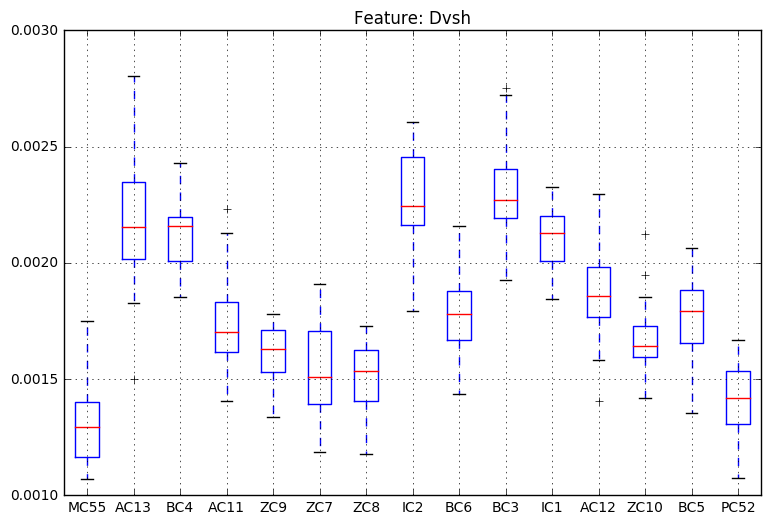

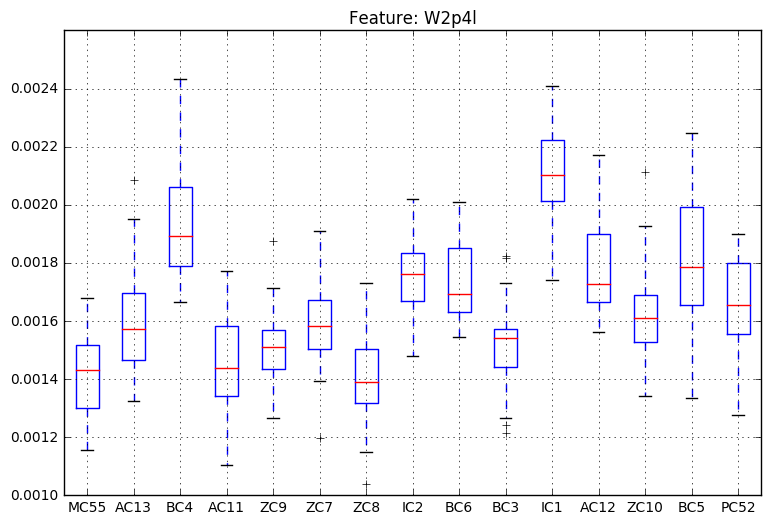

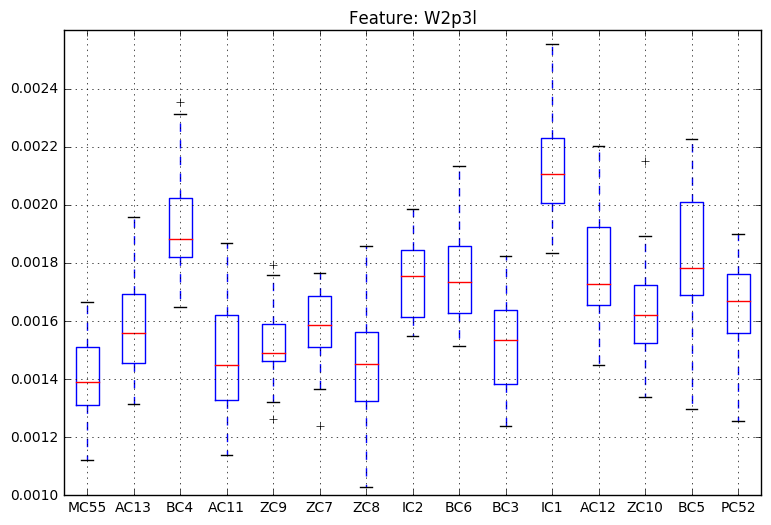

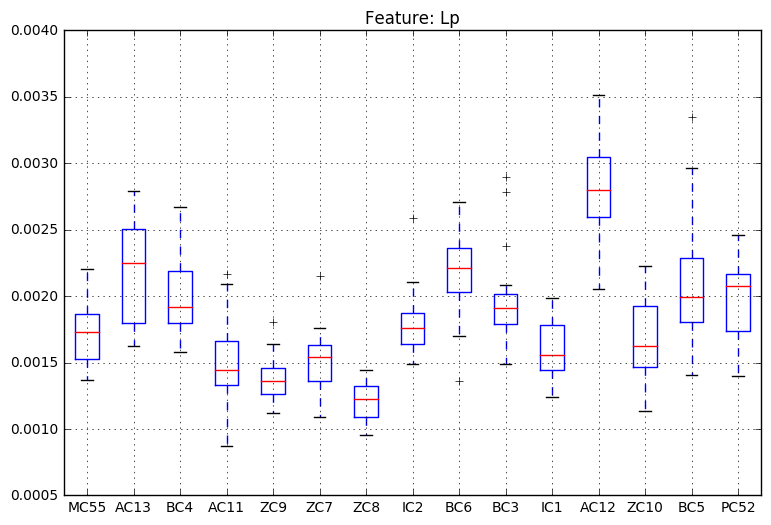

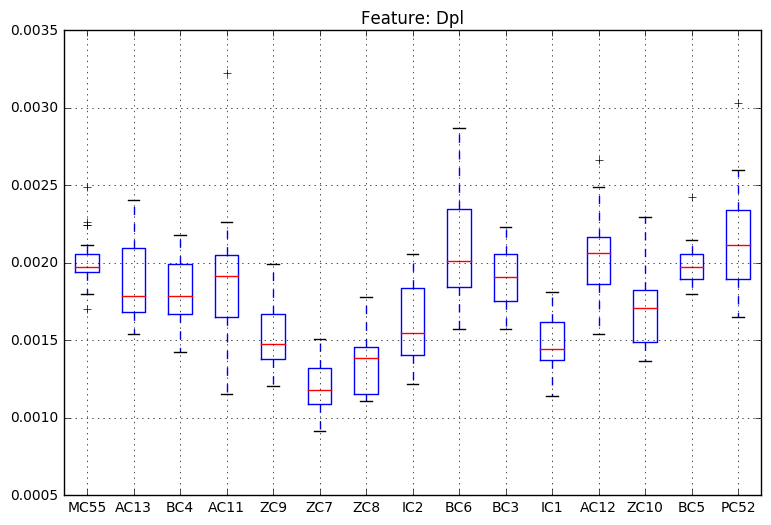

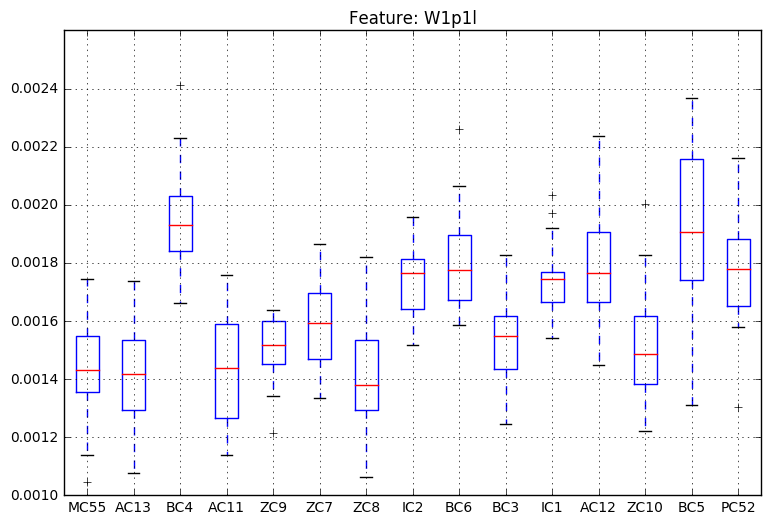

In [76]:
for var in ['Dvsh', 'W2p4l', 'W2p3l', 'Lp', 'Dpl', 'W1p1l']:
    res = [x[var].tolist() for x in splitted]
    f=plt.figure(figsize=(9,6))
    ax=f.add_subplot(111)
    ax.boxplot(res, labels=places)
    ax.set_title('Feature: %s' % var)
    ax.grid('on')
    

## Последующий анализ выявления различий (Post-hoc)

In [78]:
pd.concat(splitted)

(300, 71)